In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

# Qwen2.5-VL-3B-Instruct & 0.395 & 0.035 & 0.540 & & 0.215\\
# Qwen2.5-VL-7B-Instruct & 0.820 & 0.135 & 0.520 & & 0.315\\
# Llama-3.2-90B-Vision-Instruct & 0.655 & 0.180 & 0.626 & & 0.178
# Qwen2.5-VL-72B-Instruct & 0.790 & 0.250 & 0.642 & 0.920 & 0.390\\
# Gemini-2.0-Flash & 0.805 & 0.690 & 0.652 & & 0.405\\
model_sizes = [3, 7, 72]
qwen_3b = [0.075, 0.015, 0.530, 0.215]
qwen_7b = [0.595, 0.03, 0.510, 0.300]
llama_90 = [0.655, 0.180, 0.626, 0.178]
qwen_72b = [0.790, 0.250, 0.642, 0.390, 0.92]
gemini = [0.805, 0.710, 0.652, 0.405, 0.92]
avg = [np.mean(qwen_3b), np.mean(qwen_7b), np.mean(qwen_72b)]
std = [np.std(qwen_3b), np.std(qwen_7b), np.std(qwen_72b)]

model_accs = [
    # ("Gemini 8B", 8, [0.645, 0.0, 0.61, 0.37]),
    ("Qwen2.5 VL", 3, [0.075, 0.015, 0.560, 0.215, 0.25]),
    ("Qwen2.5 VL", 7, [0.595, 0.030, 0.64, 0.335, 0.65]),
    ("Qwen2.5 VL", 72, [0.790, 0.250, 0.79, 0.390, 0.900]),
    ("Llama 3.2", 11, [0.645, 0.0, 0.285, 0.225]),
    ("Llama 3.2", 90, [0.655, 0.180, 0.626, 0.178]),
    ("InternVL 2.5", 8, [0.54, 0.025, 0.15, 0.25, 0.16]),
    ("InternVL 2.5", 38, [0.825, 0.14, 0.73, 0.335, 0.730]),
    ("InternVL 2.5", 78, [0.83, 0.00, 0.76, 0.355, 0.880]),
    ("Gemini Flash", -1, [0.815, 0.710, 0.760, 0.405, 0.765]),
    ("Phi 3.5", 4, [0.17, 0.01, 0.53, 0.055]),
    # ("GPT 4o", -1, [0, 0, 0, 0.473]),
    ("GPT 4o Latest", -1, [0.86, 0, 0, 0.509])
    
]

scallop = 0.84

/tmp/ipykernel_3189462/191516099.py:29: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.0)


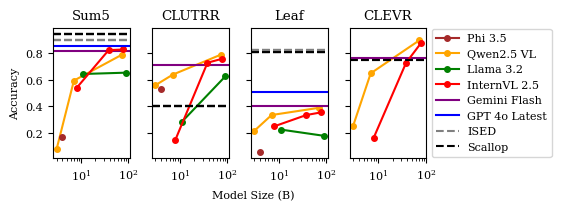

In [5]:
from matplotlib import pyplot as plt

# Sum5

# set size
# set font
plt.rcParams.update({'font.size': 8})
plt.rcParams.update({'font.family': 'serif'})

# set constrained layout



colors_by_model = {
    # "Gemini 8B": 'blue',
    "Qwen2.5 VL": 'orange',
    "Llama 3.2": 'green',
    "Gemini Flash": 'purple',
    "InternVL 2.5": 'red',
    "Phi 3.5": 'brown',
    "GPT 4o": 'blue',
    "GPT 4o Latest": 'blue'
}

linewidth = 1.5

# create 3 scatter plots for index 0, 2, 3 of accs
fig, axes = plt.subplots(1, 4, figsize=(5.5, 2), sharey=True, constrained_layout=True)
plt.subplots_adjust(wspace=0.0)

scallop = [0.95, 0.95, 0.4, 0.81]
ised = [0.90, -1, -1, 0.8232]
for i, model_name in enumerate(colors_by_model.keys()):
    sizes = [size for model, size, accs in model_accs if model == model_name]
    accs = [accs for model, size, accs in model_accs if model == model_name]
    if -1 not in sizes:
        axes[0].plot(sizes, [acc[0] for acc in accs], label=model_name, color=colors_by_model[model_name], marker='o', lw=linewidth, markersize=4)
        # axes[1].plot(sizes, [acc[1] for acc in accs], label=model_name, color=colors_by_model[model_name], marker='o', lw=linewidth, markersize=4)
        axes[1].plot(sizes, [acc[2] for acc in accs], label=model_name, color=colors_by_model[model_name], marker='o', lw=linewidth, markersize=4)
        axes[2].plot(sizes, [acc[3] for acc in accs], label=model_name, color=colors_by_model[model_name], marker='o', lw=linewidth, markersize=4)
        if len(accs) > 0 and len(accs[0]) > 4:
            axes[3].plot(sizes, [acc[4] for acc in accs], label=model_name, color=colors_by_model[model_name], marker='o', lw=linewidth, markersize=4)
        axes[0].axhline(y=scallop[0], color='black', linestyle='--', label="Scallop")
        # axes[1].axhline(y=scallop[1], color='black', linestyle='--', label="Scallop")
        axes[1].axhline(y=scallop[2], color='black', linestyle='--', label="Scallop")
        axes[2].axhline(y=scallop[3], color='black', linestyle='--', label="Scallop")
        axes[0].axhline(y=ised[0], color='gray', linestyle='--', label="ISED")
        axes[2].axhline(y=ised[3], color='gray', linestyle='--', label="ISED")
        if len(accs) > 0 and len(accs[0]) > 4:
            axes[3].axhline(y=0.75, color='black', linestyle='--', label="Scallop")
    else:
        # add a dotted line for flash
        if model_name != "GPT 4o Latest":
            axes[1].axhline(y=accs[0][1], color=colors_by_model[model_name], linestyle='solid', label=model_name, lw=linewidth)
            # axes[1].axhline(y=accs[0][1], color=colors_by_model[model_name], linestyle='solid', label=model_name, lw=linewidth)
        axes[0].axhline(y=accs[0][0], color=colors_by_model[model_name], linestyle='solid', label=model_name, lw=linewidth)
        axes[2].axhline(y=accs[0][3], color=colors_by_model[model_name], linestyle='solid', label=model_name, lw=linewidth)
        if len(accs) > 0 and len(accs[0]) > 4:
            axes[3].axhline(y=accs[0][4], label=model_name, color=colors_by_model[model_name], linestyle='solid', lw=linewidth)

# # plot each model size and accuracy
# for model, size, accs in model_accs:
#     if size != -1:
#         plt.scatter(size, accs[0], label=model, color=colors_by_model[model])
# plt.axhline(y=0.95, color='r', linestyle='--', label="Scallop")


# limit number of xticks to 5
# plt.xlabel("Model Size (B)")
# plt.xscale('log')
# plt.ylabel("Avg. Accuracy")
# axes[1].set_xlabel("Model Size (B)")
# axes[1].set_xlabel("Model Size (B)")
fig.supxlabel('Model Size (B)', fontsize=8, x=0.45)
axes[0].set_ylabel("Accuracy")
# set log
axes[0].set_xscale('log')
# axes[1].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
axes[3].set_xscale('log')
axes[3].set_xticks([10, 100])

axes[0].set_title("Sum5")
# axes[1].set_title("HWF5")
axes[1].set_title("CLUTRR")
axes[2].set_title("Leaf")
axes[3].set_title("CLEVR")

# only include legend items for unique colors
handles, labels = axes[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
label_order = ["Phi 3.5", "Qwen2.5 VL", "Llama 3.2", "InternVL 2.5", "Gemini Flash", "GPT 4o Latest", "ISED", "Scallop"]
plt.legend([by_label[label] for label in label_order], label_order, loc='center left', bbox_to_anchor=(1, 0.5))
# place legend outside of plot to the right

plt.savefig("../figures/model_size_vs_acc.pdf")
plt.show()

In [7]:
noise = [0.015625, 0.03125, 0.0625, 0.125, 0.25]
clevr_scallop = [0.62, 0.56, 0.37, 0.15]
clevr_gemini = [None, 0.585, 0.425, 0.255]

leaf_scallop = [0.8545, 0.7727, 0.6, None]
hwf_scallop = [0.77, 0.755, 0.735, None]
sum5_scallop = [None, 0.955, 0.955, 0.87, 0.185]

sum5_gemini = [0.81, 0.81, 0.805, 0.745, 0.535]

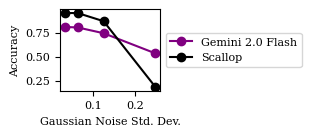

In [10]:
from matplotlib import pyplot as plt
# sum5_noise = [0, 0.05, 0.18, 0.38]
# gemini = [0.815, 0.61, 0.565, 0.455]
# qwen_7b = [0.83, 0.67, 0.665, 0.6]
# scallop = [0.975, 0.83, 0.485, 0.125]

plt.rcParams.update({'font.size': 8})
plt.rcParams.update({'font.family': 'serif'})
fig, axes = plt.subplots(1, 1, figsize=(3, 1.25), constrained_layout=True)

axes.plot(noise[1:], sum5_gemini[1:], label="Gemini 2.0 Flash", color='purple', marker='o')
# axes.plot(noise[1:], qwen_7b[1:], label="Qwen2.5 VL 7B", color='orange', marker='o')
axes.plot(noise[1:], sum5_scallop[1:], label="Scallop", color='black', marker='o')
axes.set_xlabel("Gaussian Noise Std. Dev.")
axes.set_ylabel("Accuracy")

# place legend outside of plot to the right
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("../figures/noise_vs_acc.pdf")
plt.show()

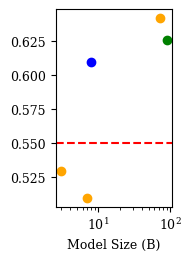

In [20]:
# Sum5

# set size
plt.figure(figsize=(1.80, 2.50), constrained_layout=True)
# set font
plt.rcParams.update({'font.size': 9})
plt.rcParams.update({'font.family': 'serif'})

# set constrained layout

plt.axhline(y=0.55, color='r', linestyle='--', label="Scallop")


colors_by_model = {
    "Gemini 1.5 Flash-8B": 'blue',
    "Qwen2.5 VL Instruct": 'orange',
    "Llama 3.2 Vision Instruct": 'green',
    "Gemini 2.0 Flash": 'purple'
}

# plot each model size and accuracy
for model, size, accs in model_accs:
    if size != -1:
        plt.scatter(size, accs[2], label=model, color=colors_by_model[model])


# limit number of xticks to 5
plt.xlabel("Model Size (B)")
plt.xscale('log')
# plt.ylabel("Avg. Accuracy")
# plt.legend()
plt.show()

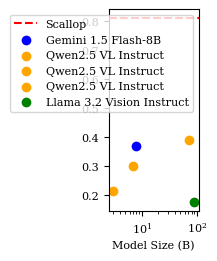

In [24]:
# Leaf

# set size
plt.figure(figsize=(1.80, 2.50), constrained_layout=True)
# set font
plt.rcParams.update({'font.size': 8})
plt.rcParams.update({'font.family': 'serif'})

# set constrained layout

plt.axhline(y=0.81, color='r', linestyle='--', label="Scallop")


colors_by_model = {
    "Gemini 1.5 Flash-8B": 'blue',
    "Qwen2.5 VL Instruct": 'orange',
    "Llama 3.2 Vision Instruct": 'green',
    "Gemini 2.0 Flash": 'purple'
}

# plot each model size and accuracy
for model, size, accs in model_accs:
    if size != -1:
        plt.scatter(size, accs[3], label=model, color=colors_by_model[model])


# limit number of xticks to 5
plt.xlabel("Model Size (B)")
plt.xscale('log')
# plt.ylabel("Avg. Accuracy")
plt.legend()
plt.show()

/tmp/ipykernel_3059936/2309913975.py:18: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date([datestr2num(date) for date in release_dates], accs, linestyle='-', marker='o', label="FMs (~70B)")
/tmp/ipykernel_3059936/2309913975.py:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date([datestr2num(date) for date in release_dates], accs, linestyle='-', marker='o', label="FMs (~70B)")


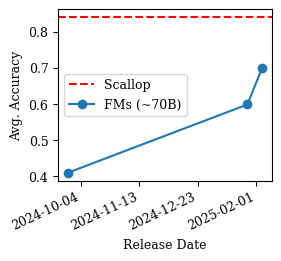

In [2]:
from matplotlib import pyplot as plt
from matplotlib.dates import datestr2num

# by time
release_dates = ["2024-09-25", "2025-1-26", "2025-2-5"]
accs = [np.mean(llama_90), np.mean(qwen_72b), np.mean(gemini)]

# set size
plt.figure(figsize=(2.70, 2.50), constrained_layout=True)
# set font
plt.rcParams.update({'font.size': 9})
plt.rcParams.update({'font.family': 'serif'})

# set constrained layout

plt.axhline(y=scallop, color='r', linestyle='--', label="Scallop")

plt.plot_date([datestr2num(date) for date in release_dates], accs, linestyle='-', marker='o', label="FMs (~70B)")

# limit number of xticks to 5
plt.xticks(rotation=25, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(4))
plt.xlabel("Release Date")
plt.ylabel("Avg. Accuracy")
plt.legend()
plt.savefig("../figures/time_scaling.pdf")
plt.show()

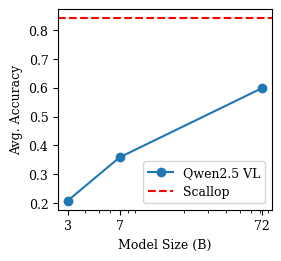

In [3]:
from matplotlib import pyplot as plt

plt.figure(figsize=(2.70, 2.50), constrained_layout=True)
# set font
plt.rcParams.update({'font.size': 9})
plt.rcParams.update({'font.family': 'serif'})

plt.plot(model_sizes, avg, marker='o', linestyle='-', label="Qwen2.5 VL")
# plt.fill_between(model_sizes, np.array(avg) - np.array(std), np.array(avg) + np.array(std), alpha=0.2)
plt.axhline(y=scallop, color='r', linestyle='--', label="Scallop")
plt.xscale('log')
plt.xticks(model_sizes, model_sizes)
plt.xlabel("Model Size (B)")
plt.ylabel("Avg. Accuracy")
plt.legend()
plt.savefig("../figures/size_scaling.pdf")
plt.show()